# Optimisation outcomes

## Data loading

In [7]:
import pandas as pd
import seaborn as sns
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
outcomes = pd.read_csv('10_solution.csv')

In [9]:
outcomes = outcomes[['hydropowerAk', 'hydropowerKp', 'environment', 'irrigation', 'floodcontrol']]
outcomes

,hydropowerAk,hydropowerKp,environment,irrigation,floodcontrol
0,4459.467657,886.048866,0.451960,0.138000,0.0
1,4469.125135,888.249056,0.442041,0.196994,0.0
2,4422.183625,878.146532,0.480113,0.190492,0.0
3,4469.482053,887.581210,0.412943,0.242108,0.0
4,4429.141772,875.855240,0.481247,0.428530,0.0
...,...,...,...,...,...
262,3889.659253,746.358699,0.580822,0.880408,0.0
263,4310.451558,838.420150,0.493151,0.902331,0.0
264,3259.067215,611.907294,0.673973,0.905194,0.0
265,4345.729170,852.540409,0.490128,0.771188,0.0


In [5]:
best_hpak =  outcomes[outcomes['hydropowerAk'] == outcomes['hydropowerAk'].max()]
best_hpkp =  outcomes[outcomes['hydropowerKp'] == outcomes['hydropowerKp'].max()]
best_env = outcomes[outcomes['environment'] == outcomes['environment'].max()]
best_irri = outcomes[outcomes['irrigation'] == outcomes['irrigation'].max()]

## Pareto Front plot

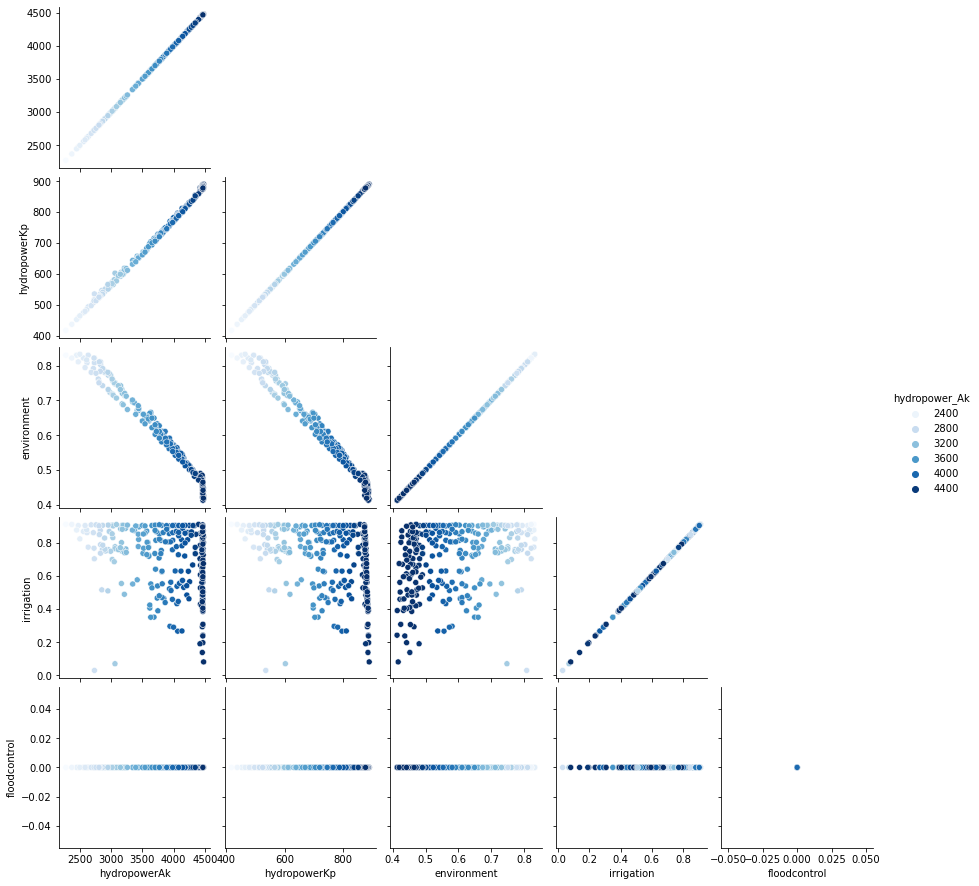

In [6]:
outcomes_pairplot = outcomes
outcomes_pairplot['hydropower_Ak'] = outcomes['hydropowerAk']
sns.pairplot(outcomes,corner=True, diag_kind=None, hue='hydropower_Ak', palette='Blues')
# fig =sns_plot.get_figure()
plt.savefig('Paretofront_optimised_policies.png', dpi=300)

See two outliers. Hydropower and irrigation need to make way for environment

## Optimised policies paralel axis with best

In [12]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

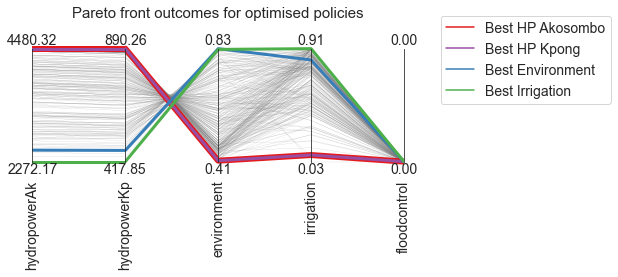

In [10]:
colors = plt.cm.Set1(np.linspace(0, 1,9))

data = pd.DataFrame(outcomes)

limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data, color = 'grey', linewidth=0.1)


lineWBest= 3
paraxes.plot(best_hpak, label = 'Best HP Akosombo', linewidth=lineWBest+3, color=colors[0])
paraxes.plot(best_hpkp, label = 'Best HP Kpong', linewidth=lineWBest, color=colors[3])
paraxes.plot(best_env, label = 'Best Environment', linewidth=lineWBest, color=colors[1])
paraxes.plot(best_irri, label = 'Best Irrigation', linewidth=lineWBest, color=colors[2])

plt.title('Pareto front outcomes for optimised policies', x=-1, y=1.1, fontdict = {'fontsize' : 15})

paraxes.legend()
plt.savefig('ParaxParetoFrontBest.svg', dpi=300);

## Paralel axis plot best and filtered policies

In [14]:
filtered_df =  outcomes[outcomes['hydropowerAk'] >= outcomes['hydropowerAk'].max()*0.8]
filtered_df =  filtered_df[filtered_df['hydropowerKp'] >= outcomes['hydropowerKp'].max()*0.75]
filtered_df = filtered_df[filtered_df['environment'] >= outcomes['environment'].max()*0.75]
filtered_df = filtered_df[filtered_df['irrigation'] >= outcomes['irrigation'].max()*0.75]

best_df = outcomes[outcomes['hydropowerAk'] == outcomes['hydropowerAk'].max()]
best_df = pd.concat([best_df, outcomes[outcomes['hydropowerKp'] == outcomes['hydropowerKp'].max()]])
best_df = pd.concat([best_df, outcomes[outcomes['environment'] == outcomes['environment'].max()]])
best_df = pd.concat([best_df, outcomes[outcomes['irrigation'] == outcomes['irrigation'].max()]])

In [15]:
selected_policy_df = pd.concat([best_df.drop_duplicates(),filtered_df])

In [16]:
policies = pd.read_csv('10_variables.csv', header=None)
policy_index = np.array(selected_policy_df.index)
filtered_policies = policies.iloc[policy_index]
filtered_policies.to_csv('../solution thining/filteredReleasePolicies.csv', header=None, index=False)
print('Number of policies used in next steps:' , len(policy_index))


Number of policies used in next steps: 9


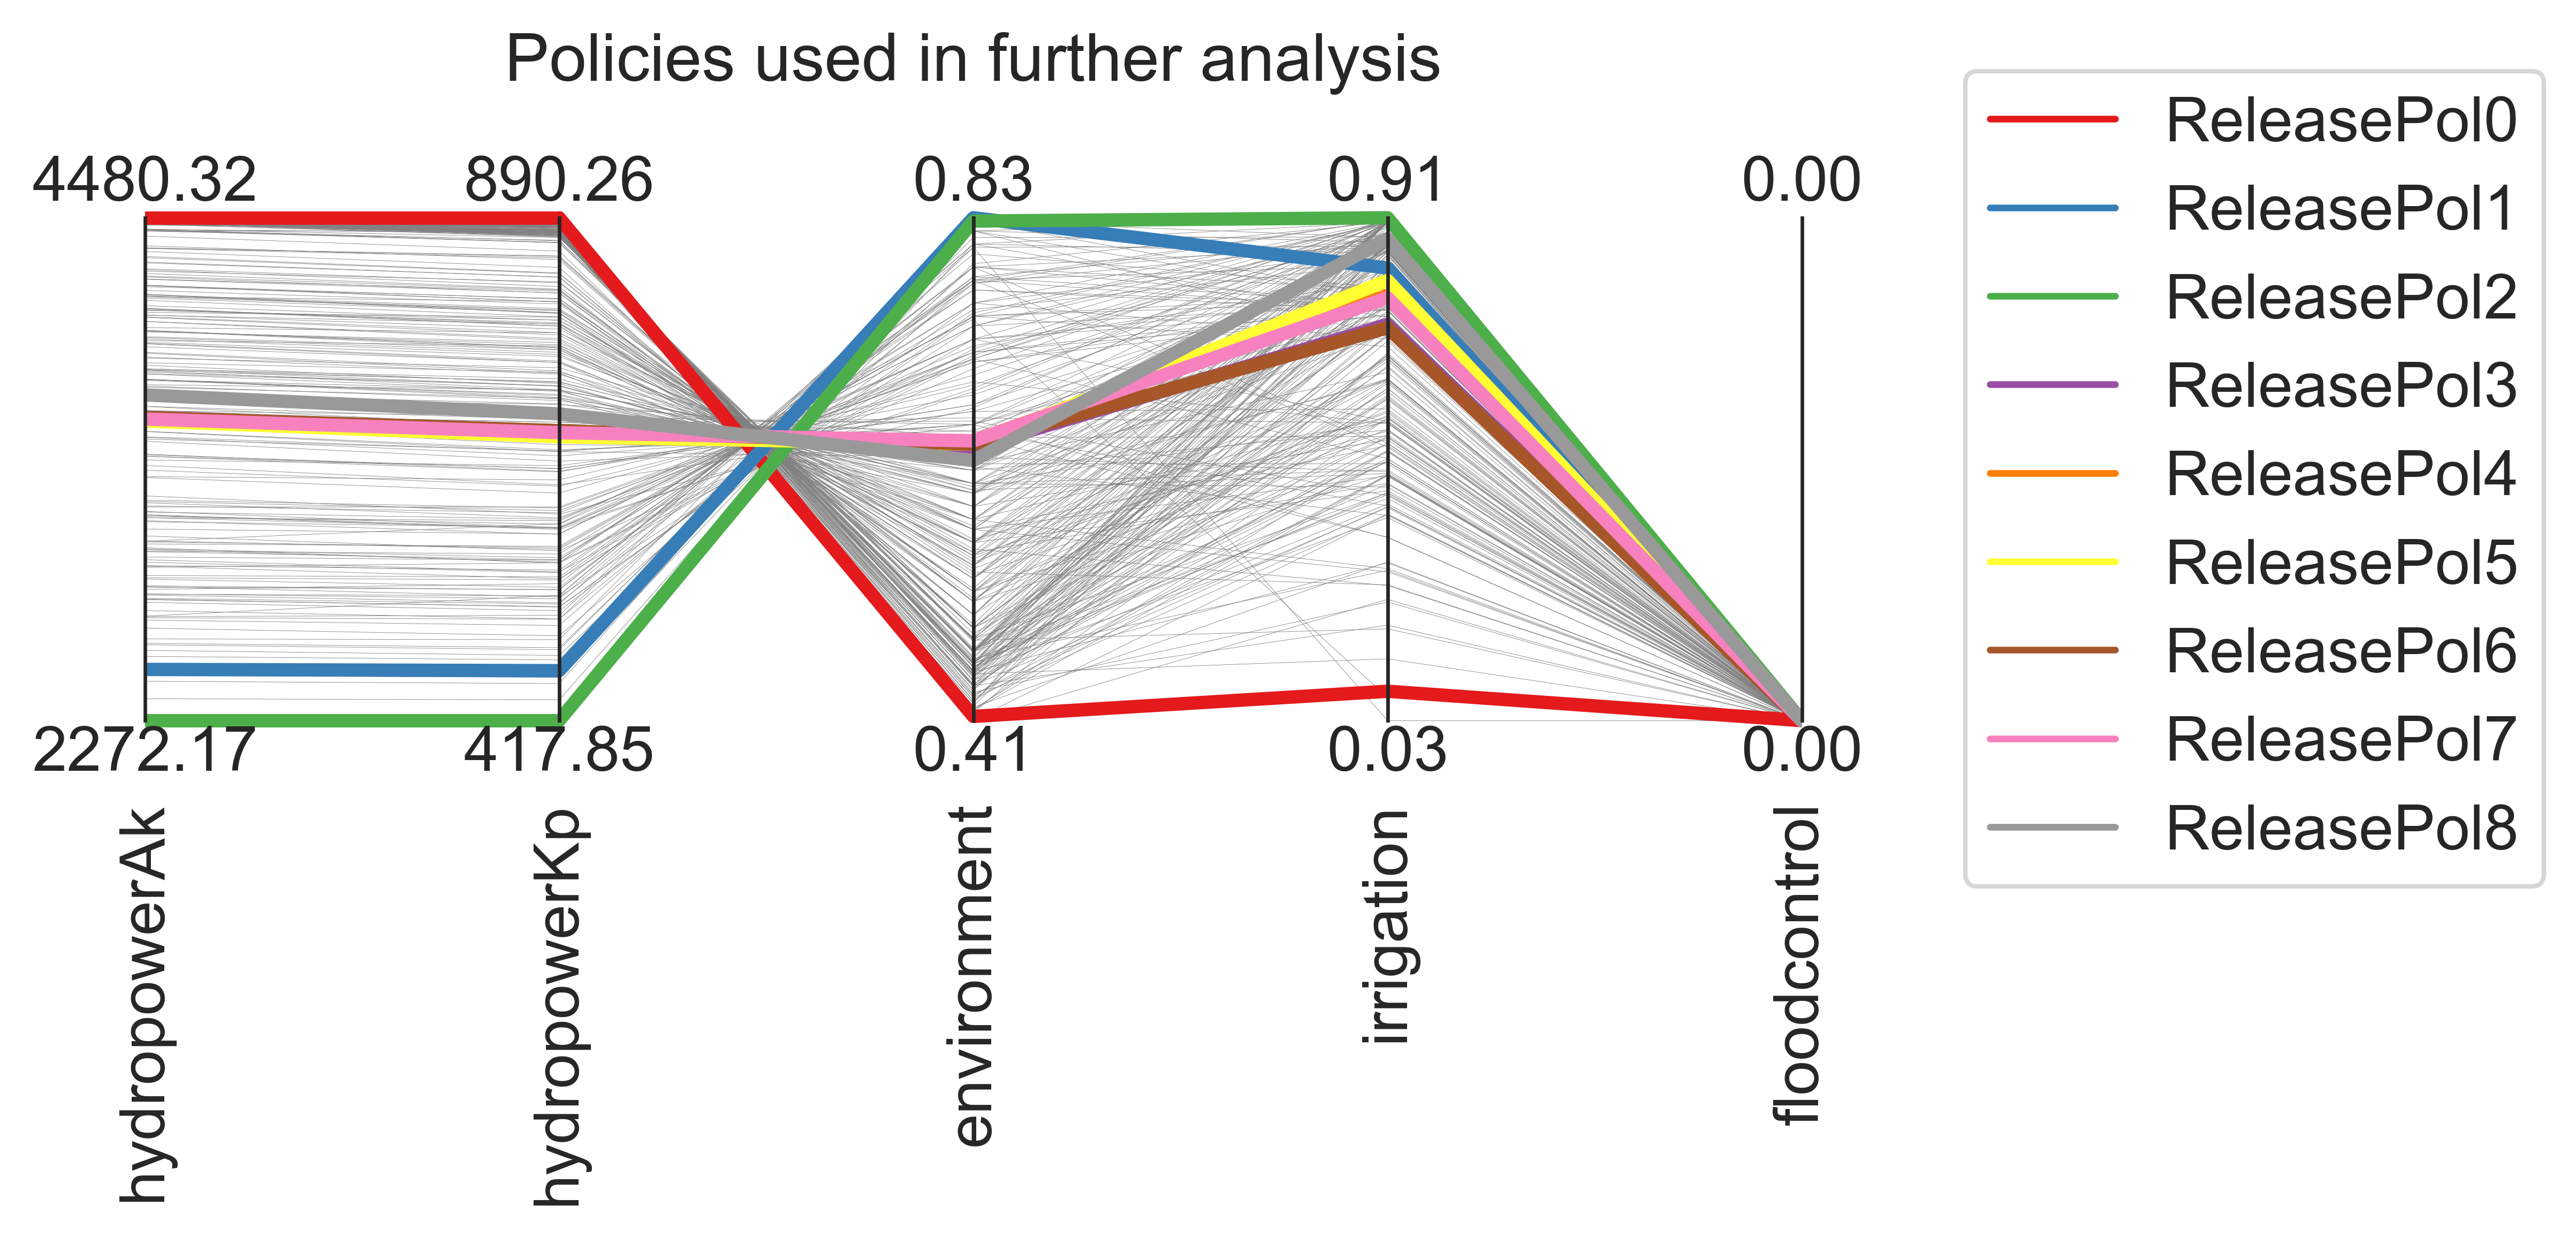

In [18]:
colors = plt.cm.Set1(np.linspace(0, 1,9))


data = pd.DataFrame(outcomes)

limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data, color = 'grey', linewidth=0.1)


lineWChosen= 1.5
for i in range(len(selected_policy_df)):
    paraxes.plot(selected_policy_df.iloc[i], label = f'ReleasePol{i}', linewidth=lineWBest, color=colors[i])


plt.title('Policies used in further analysis', x=-1, y=1.1, fontdict = {'fontsize' : 15})

paraxes.legend()
plt.savefig('ParaxSelected.png', dpi=300);